In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-3ou1omfl
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-3ou1omfl
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.035e8be4ffca4f37efe4326915d6a5b9b0fef6702_-cp36-none-any.whl size=98706 sha256=dd6413d78c8ca432462df2be01108df33fb0d6b526ac05b57d941f01be0d6b7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_1gf94n/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
tpath = "/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/"

!ls 

drive  sample_data


In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import natsort
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("tf version =",tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

tf version = 2.2.0-rc3


ModuleNotFoundError: ignored

In [ ]:
pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_train_56x56.pickle','rb')
X_train = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/y_train_56x56.pickle','rb')
y_train = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/y_test_56x56.pickle','rb')
y_test = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Datasets/X_test_56x56.pickle','rb')
X_test = pickle.load(pickle_in)

In [ ]:
size = (56,56) 

X_train = X_train.reshape(-1, size[0], size[1],1)
X_test = X_test.reshape(-1, size[0], size[1],1)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(54000, 56, 56, 1) (54000,)
(6000, 56, 56, 1) (6000,)


**Load Model**

In [ ]:
load_model = 'transmodel2'


pathm = '/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/' + load_model



model = keras.models.load_model(pathm)

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 54, 54, 64)        640       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 20, 20, 128)     

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: +/- {:5.2f} mol/l".format(mae))

563/563 - 6s - loss: 0.1017 - mean_absolute_error: 0.2442 - mean_squared_error: 0.1004
Testing set Mean Abs Error: +/-  0.24 mol/l


**Create Model**

In [ ]:
lr = 0.001

def build_model():
  model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


      
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
  ])


  optimizer = tf.keras.optimizers.Adam(lr)


  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


model = build_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 16)        4624      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)              

**Train the loaded/created Model**

Epoch 1/18
1732/1736 [============================>.] - ETA: 0s - loss: 3909.7415 - mae: 47.5948 - mse: 3909.7373
Epoch: 0, loss:3909.3911,  mae:47.5979,  mse:3909.5378,  val_loss:998.6879,  val_mae:24.0709,  val_mse:998.9861,  
1736/1736 [==============================] - 14s 8ms/step - loss: 3909.3911 - mae: 47.5979 - mse: 3909.5378 - val_loss: 998.6879 - val_mae: 24.0709 - val_mse: 998.9861
Epoch 2/18
1736/1736 [==============================] - 14s 8ms/step - loss: 3133.8896 - mae: 44.4022 - mse: 3133.8892 - val_loss: 694.5228 - val_mae: 18.3721 - val_mse: 694.8070
Epoch 3/18
1736/1736 [==============================] - 14s 8ms/step - loss: 3061.3042 - mae: 43.9939 - mse: 3061.4473 - val_loss: 778.2119 - val_mae: 20.1549 - val_mse: 778.4910
Epoch 4/18
1736/1736 [==============================] - 14s 8ms/step - loss: 3054.2322 - mae: 43.8198 - mse: 3054.2422 - val_loss: 501.4075 - val_mae: 14.4721 - val_mse: 501.6808
Epoch 5/18
1736/1736 [==============================] - 14s 8ms/st

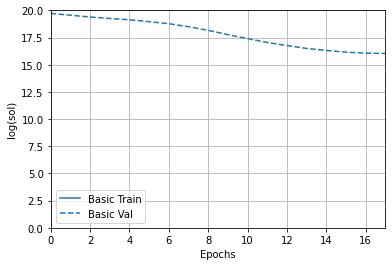

188/188 - 1s - loss: 560.1779 - mae: 17.0030 - mse: 560.6204
Testing set Mean Abs Error: +/- 17.00 mol/l


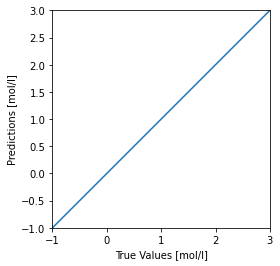

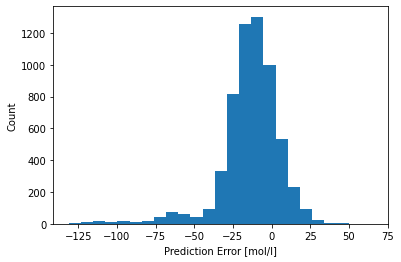

In [ ]:
epochs = 18
batch_size = 28

history = model.fit(
  X_train, y_train, batch_size = batch_size,
  epochs = epochs, validation_split = 0.1, verbose=1,
  callbacks=[tfdocs.modeling.EpochDots()])


plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 20])
plt.ylabel('Mw')
plt.show()

loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: +/- {:5.2f} mol/l".format(mae))

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [g/mol]')
plt.ylabel('Predictions [g/mol]')
lims = [-1, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [g/mol]")
_ = plt.ylabel("Count")

plt.show()

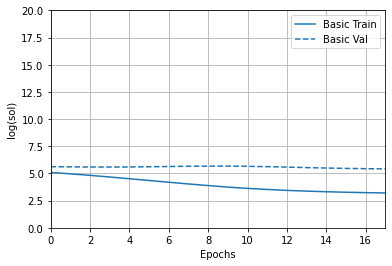

200/200 - 1s - loss: 56.2651 - mean_absolute_error: 5.8576 - mean_squared_error: 56.1940
Testing set Mean Abs Error: +/-  5.86 mol/l


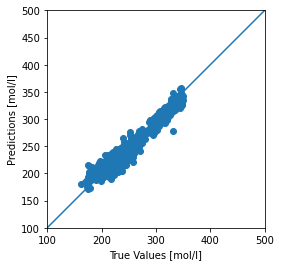

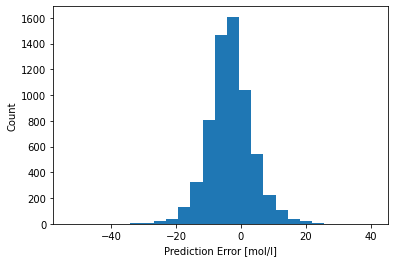

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 20])
plt.ylabel('Mw')
plt.show()

loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: +/- {:5.2f} g/mol".format(mae))

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [g/mol]')
plt.ylabel('Predictions [g/mol]')
lims = [100, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [g/mol]")
_ = plt.ylabel("Count")

plt.show()

**Save consec. trained Model**

In [ ]:
#model.save('/content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/transmodel2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Forschungspraktikum ML/Models/transmodel2c/assets
